In [ ]:
#| include: false
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
import pandas as pd

![CI](https://github.com/BojarLab/glycowork/actions/workflows/test.yaml/badge.svg) [![HitCount](https://hits.dwyl.com/BojarLab/glycowork.svg?style=flat-square)](http://hits.dwyl.com/BojarLab/glycowork)![PyPI - Downloads](https://img.shields.io/pypi/dm/glycowork?color=brightgreen)[![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/BojarLab/glycowork/issues)[![DOI](https://zenodo.org/badge/327716604.svg)](https://zenodo.org/doi/10.5281/zenodo.10039202)


<img src="./glycowork_badge_wo_bg.jpg" width="200" />

Glycans are fundamental biological sequences that are as crucial as DNA, RNA, and proteins. As complex carbohydrates forming branched structures, glycans are ubiquitous yet often overlooked in biological research.

### Why glycans are important
- Ubiquitous in biology
- Integral to protein and lipid function
- Relevant to human diseases

### Challenges in Glycan Analysis
Analyzing glycans is complicated due to their non-linear structures and enormous diversity. But that's where `glycowork` comes in.

### Introducing glycowork: Your Solution for Glycan-Focused Data Science
Glycowork is a Python package specifically designed to simplify glycan sequence processing and analysis. It offers:

- Functions for glycan analysis
- Datasets for model training
- Full support for IUPAC-condensed string representation. Broad support for IUPAC-extended, LinearCode, GlycoCT, and WURCS.
- Powerful graph-based architecture for in-depth analysis

**Documentation:** https://bojarlab.github.io/glycowork/

**Contribute:** Interested in contributing? Read our [Contribution Guidelines](https://github.com/BojarLab/glycowork/blob/master/CONTRIBUTING.md)

**Citation:** If `glycowork` adds value to your project, please cite [Thomes et al., 2021](https://academic.oup.com/glycob/advance-article/doi/10.1093/glycob/cwab067/6311240)

## Install

via pip: <br>
`pip install glycowork` <br>
`import glycowork`

alternative: <br>
`pip install git+https://github.com/BojarLab/glycowork.git` <br>
`import glycowork`

Note that we have optional extra installs for specialized use (even further instructions can be found in the `Examples` tab), such as: <br>
_deep learning_ <br>
`pip install glycowork[ml]` <br>
_drawing glycan images with GlycoDraw (see install instructions in the `Examples` tab)_ <br>
`pip install glycowork[draw]` <br>
_analyzing atomic/chemical properties of glycans_ <br>
`pip install glycowork[chem]` <br>
_everything_ <br>
`pip install glycowork[all]` <br>

## Data & Models

`Glycowork` currently contains the following main datasets that are freely available to everyone:

- **`df_glycan`**
    - contains ~50,000 unique glycan sequences, including labels such as ~35,000 species associations, ~14,000 tissue associations, and ~1,000 disease associations
- **`glycan_binding`**
    - contains >550,000 protein-glycan binding interactions, from 1,392 unique glycan-binding proteins
    
Additionally, we store these trained deep learning models for easy usage, which can be retrieved with the `prep_model` function:

- **`LectinOracle`**
    - can be used to predict glycan-binding specificity of a protein, given its ESM-1b representation; from [Lundstrom et al., 2021](https://onlinelibrary.wiley.com/doi/10.1002/advs.202103807)
- **`LectinOracle_flex`**
    - operates the same as LectinOracle but can directly use the raw protein sequence as input (no ESM-1b representation required)
- **`SweetNet`**
    - a graph convolutional neural network trained to predict species from glycan, can be used to generate learned glycan representations; from [Burkholz et al., 2021](https://pubmed.ncbi.nlm.nih.gov/34133929/)
- **`NSequonPred`**
    - given the ESM-1b representation of an N-sequon (+/- 20 AA), this model can predict whether the sequon will be glycosylated

## How to use

`Glycowork` currently contains four main modules:

 - **`glycan_data`**
     - stores several glycan datasets and contains helper functions
 - **`ml`**
     - here are all the functions for training and using machine learning models, including train-test-split, getting glycan representations, etc.
 - **`motif`**
     - contains functions for processing & drawing glycan sequences, identifying motifs and features, and analyzing them
 - **`network`**
     - contains functions for constructing and analyzing glycan networks (e.g., biosynthetic networks)
     
Below are some examples of what you can do with `glycowork`; be sure to check out the other `examples` in the full documentation for everything that's there.
A non-exhaustive list includes:

- using trained AI models for prediction
- training your own AI models
- motif enrichment analyses
- annotating motifs in glycans
- drawing publication-quality glycan figures
- finding out whether & where glycans are describing the same sequence
- m/z to composition to structure to motif mappings
- mass calculation
- visualizing motif distribution / glycan similarities / sequence properties
- constructing and analyzing biosynthetic networks

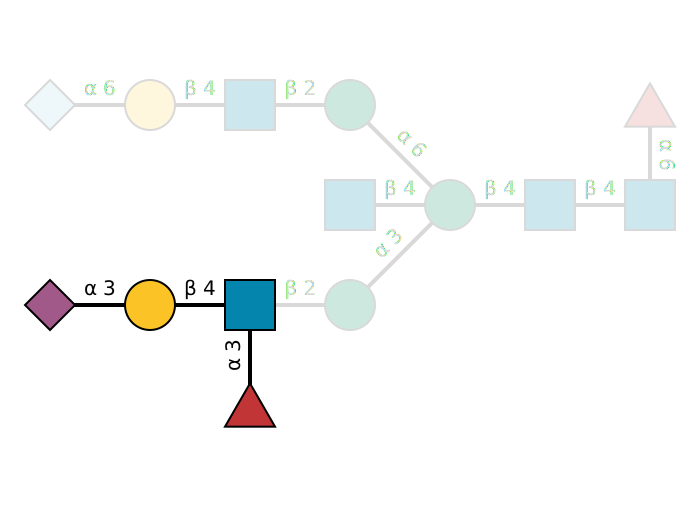

In [ ]:
#drawing publication-quality glycan figures
from glycowork.motif.draw import GlycoDraw
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", highlight_motif = "Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc")

In [ ]:
#get motifs, graph features, and sequence features of a set of glycan sequences to train models or analyze glycan properties
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN1P']
from glycowork.motif.annotate import annotate_dataset
out = annotate_dataset(glycans, feature_set = ['known', 'terminal', 'exhaustive']).head()

In [ ]:
#| echo: false
HTML(out.to_html())

,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,Internal_LacNAc_type1,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Internal_LacdiNAc_type1,Terminal_LacdiNAc_type1,Internal_LacdiNAc_type2,Terminal_LacdiNAc_type2,bisectingGlcNAc,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series(LewisC),NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,Sda,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a_2,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,core_fucose(a1-3),GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,Gala_series,LPS_core,Nglycan_complex,Nglycan_complex2,Oglycan_core1,Oglycan_core2,Oglycan_core3,Oglycan_core4,Oglycan_core5,Oglycan_core6,Oglycan_core7,Xylogalacturonan,Sialosylparagloboside,LDNF,OFuc,Arabinogalactan_type2,EGF_repeat,Nglycan_hybrid,Arabinan,Xyloglucan,Acharan_Sulfate,M3FX,M3X,1-6betaGalactan,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core,Fuc,GalNAc,GlcN,GlcN1P,GlcN4P,GlcNAc,GlcNAcA,Kdo,Man,Xyl,Man(a1-3)Man,Man(a1-6)Man,Xyl(b1-2)Man,Man(b1-4)GlcNAc,GlcNAc(b1-4)GlcNAc,Fuc(a1-3)GlcNAc,Man(a1-2)Man,GalNAc(a1-4)GlcNAcA,GlcNAcA(a1-4)Kdo,GlcN(b1-7)Kdo,Kdo(a2-5)Kdo,Kdo(a2-4)Kdo,Kdo(a2-6)GlcN4P,GlcN4P(b1-6)GlcN1P,Man(a1-?)Man,Xyl(b1-?)Man,Man(b1-?)GlcNAc,GlcNAc(b1-?)GlcNAc,Fuc(a1-?)GlcNAc,GalNAc(a1-?)GlcNAcA,GlcNAcA(a1-?)Kdo,GlcN(b1-?)Kdo,Kdo(a2-?)Kdo,Kdo(a2-?)GlcN4P,GlcN4P(b1-?)GlcN1P,Kdo(a2-4),Man(a1-3),Man(a1-6),GalNAc(a1-4),Man(a1-2),Fuc(a1-3),GlcN(b1-7),Xyl(b1-2),Man(a1-?)
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,3,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,2,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,2
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,6,0,2,1,0,1,1,0,2,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN1P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,3,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,2,1,1,1,0,0,1,0,0,1,0,0


In [ ]:
#using graphs, you can easily check whether a glycan contains a specific motif; how about internal Lewis A/X motifs?
from glycowork.motif.graph import subgraph_isomorphism
print(subgraph_isomorphism('Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'Fuc(a1-?)[Gal(b1-?)]GlcNAc', termini_list = ['terminal', 'internal', 'flexible']))
print(subgraph_isomorphism('Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'Fuc(a1-?)[Gal(b1-?)]GlcNAc', termini_list = ['terminal', 'internal', 'flexible']))
print(subgraph_isomorphism('Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'Fuc(a1-?)[Gal(b1-?)]GlcNAc', termini_list = ['terminal', 'internal', 'flexible']))

#or you could find the terminal structures of a glycan
from glycowork.motif.annotate import get_terminal_structures
print("\nTerminal structures:")
print(get_terminal_structures('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

True
True
False

Terminal structures:
['Man(a1-3)', 'Man(a1-6)', 'Fuc(a1-6)']


In [ ]:
#given a composition, find matching glycan structures in SugarBase; specific for glycan classes and taxonomy
from glycowork.motif.tokenization import compositions_to_structures
print(compositions_to_structures([{'Hex':3, 'HexNAc':4}], glycan_class = 'N'))

#or we could calculate the mass of this composition
from glycowork.motif.tokenization import composition_to_mass
print("\nMass of the composition Hex3HexNAc4")
print(composition_to_mass({'Hex':3, 'HexNAc':4}))

0 compositions could not be matched. Run with verbose = True to see which compositions.
                                               glycan  abundance
0   GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Ma...          0
1   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Ma...          0
2   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][G...          0
3   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)[GlcNAc(b1-4...          0
4   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-4)][Man(a1-6)]...          0
5   GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-6)Man(a1-6)]Ma...          0
6   GlcNAc(b1-4)Man(a1-3)[GlcNAc(b1-6)Man(a1-6)]Ma...          0
7   GlcNAc(b1-2)Man(a1-6)[Man(a1-3)][GlcNAc(b1-4)]...          0
8   Man(a1-3)[GlcNAc(b1-4)][GlcNAc(b1-2)Man(a1-6)]...          0
9   GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-...          0
10  GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Man(a1-6)]...          0
11  GlcNAc(b1-4)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Ma...          0
12  GlcNAc(?1-?)Man(a1-3)[GlcNAc(?1-?)Man(a1-6)]Ma...          0
13

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()